# Google Drive <-> Google Colaboratory

In [1]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



    100% |████████████████████████████████| 993kB 6.2MB/s 
Uploaded file with ID 1xSpkqokICQVUd1bhPnGq_zVlZYJDgmQb


In [2]:
# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'File2.txt'})
uploaded.SetContentString('Hello World')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1U0LJtwyr29QpJ6lVeDdwm0JGn1ASRPCJ


In [12]:
# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title mobile_cleaned.csv, id 1kE2SbrXuVLZcE0wnTCANZPsuMvej3YGz


In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1kE2SbrXuVLZcE0wnTCANZPsuMvej3YGz'  # https://drive.google.com/open?id=1kE2SbrXuVLZcE0wnTCANZPsuMvej3YGz
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
downloaded.GetContentFile('mobile_cleaned_local.csv')

In [7]:
!ls

adc.json  mobile_cleaned_local.csv  sample_data


In [0]:
import pandas as pd

# Pandas

In [0]:
df = pd.read_csv('mobile_cleaned_local.csv')

In [11]:
df.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,...,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,...,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,...,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,...,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,...,4,1,6,91.0,32.0,6,3,3000,165,0


In [13]:
df.tail()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
104,3,10,14,192.0,540,1.8,9.4,2,2.0,2,...,4,29,6,77.2,256.0,6,3,3410,8,1
105,0,5,3,157.0,400,2.3,7.7,5,5.0,3,...,6,27,1,72.6,200.0,9,3,3600,101,1
106,3,10,6,192.0,384,1.8,7.3,2,5.0,3,...,1,16,6,77.9,0.0,14,13,2750,1,1
107,3,10,12,129.0,250,1.4,6.9,2,1.2,3,...,1,13,6,67.0,0.0,12,13,1810,7,1
108,2,8,3,158.0,400,2.2,7.4,6,8.0,3,...,5,16,6,74.7,0.0,10,12,3000,2,0


In [14]:
type(df)

pandas.core.frame.DataFrame

In [0]:
dir(df)

In [16]:
len(df)

109

In [17]:
df.shape

(109, 40)

In [18]:
df.loc[5]

sim_type                                0.0
aperture                               14.0
gpu_rank                               55.0
weight                                179.0
stand_by_time                         280.0
processor_frequency                     1.3
thickness                               7.9
flash_type                              5.0
front_camera_resolution                 5.0
auto_focus                              3.0
screen_size                             5.5
frames_per_second                      30.0
FM                                      3.0
no_of_reviews_in_gsmarena_in_week       6.0
os                                      0.0
phone_height                          150.0
screen_protection                       5.0
sim_size                                3.0
price                                5999.0
talk_time                              22.0
video_resolution                      720.0
display_resolution                      0.0
removable_battery               

In [0]:
df_short = df[23:29]

In [23]:
df_short.shape

(6, 40)

In [24]:
df_short.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
23,3,1,43,97.0,345,1.2,5.1,5,5.0,3,...,2,10,2,68.1,0.0,5,3,2000,94,1
24,0,10,29,150.0,322,1.5,8.2,5,5.0,3,...,6,23,6,71.0,32.0,6,4,2750,21,1
25,0,8,43,202.0,914,1.2,10.6,2,5.0,3,...,6,7,6,77.5,64.0,5,4,5000,94,1
26,0,8,43,170.0,456,1.2,10.8,2,5.0,3,...,4,7,6,77.2,128.0,5,3,3000,94,1
27,0,8,38,155.0,350,1.3,9.3,5,5.0,3,...,6,7,6,77.0,64.0,6,4,3000,19,1


In [0]:
df_thin = df[['stand_by_time', 'expandable_memory', 'price', 'battery_capacity', 'is_liked']]

In [26]:
df_thin.shape

(109, 5)

In [27]:
df_thin.head()

,stand_by_time,expandable_memory,price,battery_capacity,is_liked
0,250,64.0,3870,2000,1
1,300,32.0,4059,2000,1
2,329,32.0,4777,2500,0
3,385,32.0,5799,3000,1
4,385,32.0,5990,3000,0


In [0]:
df_liked = df_thin[df_thin['is_liked'] == 1]

In [29]:
df_liked.shape

(92, 5)

In [34]:
df_thin['price'].describe()

count      109.000000
mean     19373.211009
std      14039.197220
min       3870.000000
25%       8999.000000
50%      14614.000000
75%      24999.000000
max      64500.000000
Name: price, dtype: float64

In [35]:
df_thin.describe()

,stand_by_time,expandable_memory,price,battery_capacity,is_liked
count,109.00000,109.000000,109.000000,109.000000,109.000000
mean,404.66055,104.513761,19373.211009,2841.779817,0.844037
std,176.44206,275.799767,14039.197220,655.003963,0.364496
min,160.00000,0.000000,3870.000000,1560.000000,0.000000
25%,264.00000,0.000000,8999.000000,2470.000000,1.000000
50%,360.00000,32.000000,14614.000000,2900.000000,1.000000
75%,500.00000,128.000000,24999.000000,3100.000000,1.000000
max,1093.00000,2048.000000,64500.000000,5000.000000,1.000000


In [36]:
df_thin[df_thin['is_liked'] == 1]['price'].mean()

19393.239130434784

In [37]:
df_thin[df_thin['is_liked'] == 0]['price'].mean()

19264.823529411766

In [0]:
g = df_thin.groupby(['is_liked'])

In [39]:
for key, df_key in g:
  print(key)
  print(df_key)

0
     stand_by_time  expandable_memory  price  battery_capacity  is_liked
2              329               32.0   4777              2500         0
4              385               32.0   5990              3000         0
5              280               32.0   5999              2900         0
11             300              128.0   6990              2600         0
22             354              128.0   7999              2400         0
38             490               32.0   9999              2100         0
53             345               64.0  14300              2950         0
60             840                0.0  15689              4100         0
74             390              128.0  21999              2800         0
77             620              128.0  22999              3100         0
78             618                0.0  24499              3600         0
80             598                0.0  24999              3000         0
83             504              200.0  25500     

In [43]:
df_thin.groupby(['is_liked']).describe()

battery_capacity                                                   \
                    count         mean         std     min     25%     50%   
is_liked                                                                     
0                    17.0  2874.941176  591.777035  1624.0  2600.0  2900.0   
1                    92.0  2835.652174  668.850998  1560.0  2457.5  2900.0   

                         expandable_memory               ...       price  \
             75%     max             count        mean   ...         75%   
is_liked                                                 ...               
0         3000.0  4100.0              17.0   68.235294   ...    25500.00   
1         3100.0  5000.0              92.0  111.217391   ...    24924.75   

                  stand_by_time                                                \
              max         count        mean         std    min     25%    50%   
is_liked                                                                        
0         37766.0          17.0  457.235294  157.094927  240.0  345.00  400.0   
1         64500.0          92.0  394.945652  178.876246  160.0  258.25  354.0   

                         
            75%     max  
is_liked                 
0         580.0   840.0  
1         482.0  1093.0  

[2 rows x 32 columns]

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

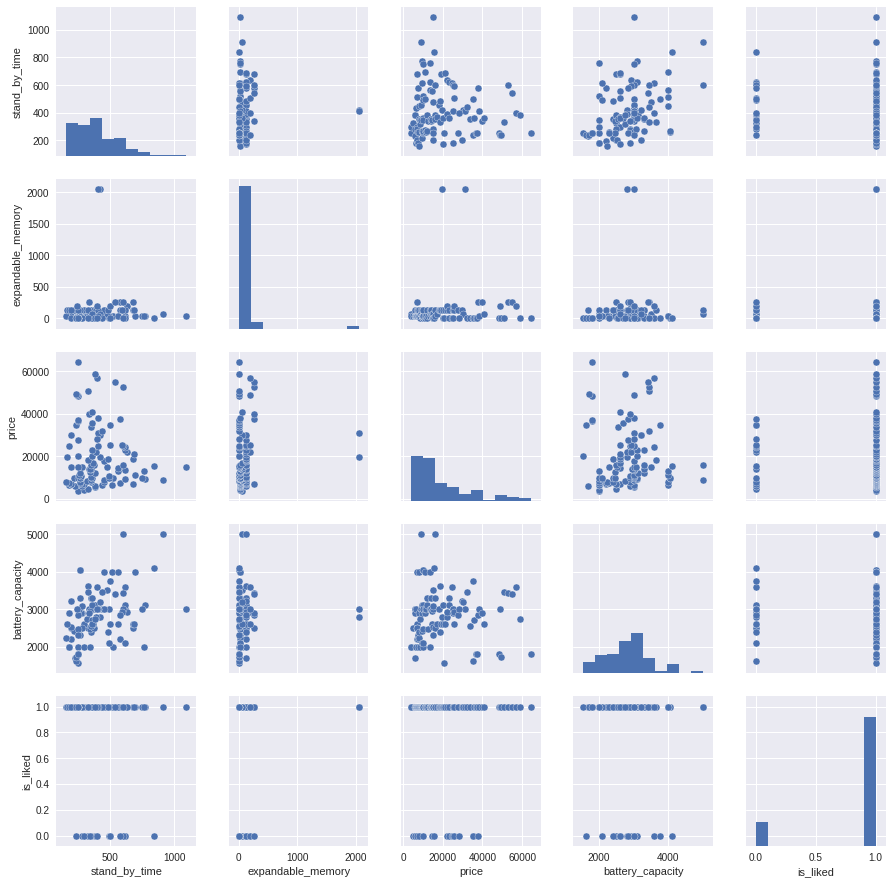

In [45]:
ax = sns.pairplot(df_thin, diag_kind='hist')

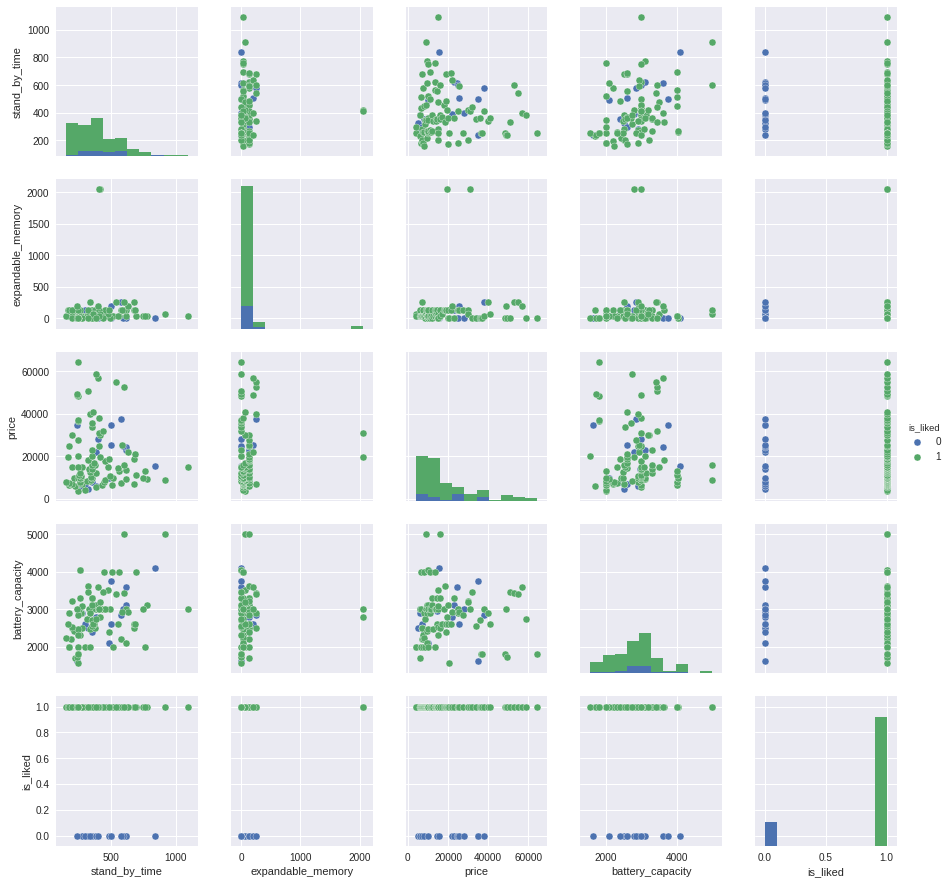

In [46]:
ax = sns.pairplot(df_thin, diag_kind='hist', hue='is_liked')

# Debugging

In [0]:
import random

In [0]:
def factorial(x):
  if (x == 0):
    return 1
  return x * factorial(x - 1)

In [49]:
factorial(5)

120

In [0]:
def code_to_debug():
  # import pdb; pdb.set_trace()
  
  for i in range(10):
    x = random.random()
    factorial(x)

In [61]:
%xmode Verbose

Exception reporting mode: Verbose


In [62]:
code_to_debug()

RecursionError: ignored

In [0]:
def factorial_debugged(x):
  if (not isinstance(x, int)):
    print('This method only supports integers')
    return -1
  if (x == 0):
    return 1
  return x * factorial(x - 1)

In [0]:
def code_to_debug():
  import pdb; pdb.set_trace()
  
  for i in range(10):
    x = random.random()
    factorial_debugged(x)

In [58]:
code_to_debug()

> <ipython-input-57-3364bd0836cb>(4)code_to_debug()
-> for i in range(10):
(Pdb) ?

Documented commands (type help <topic>):
EOF    c          d        h         list      q        rv       undisplay
a      cl         debug    help      ll        quit     s        unt      
alias  clear      disable  ignore    longlist  r        source   until    
args   commands   display  interact  n         restart  step     up       
b      condition  down     j         next      return   tbreak   w        
break  cont       enable   jump      p         retval   u        whatis   
bt     continue   exit     l         pp        run      unalias  where    

Miscellaneous help topics:
exec  pdb

(Pdb) help c
c(ont(inue))
        Continue execution, only stop when a breakpoint is encountered.
(Pdb) c
This method only supports integers
This method only supports integers
This method only supports integers
This method only supports integers
This method only supports integers
This method only supports inte